In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('monthly-sunspots.csv',parse_dates=['Month'])
df.head()

,Month,Sunspots
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0


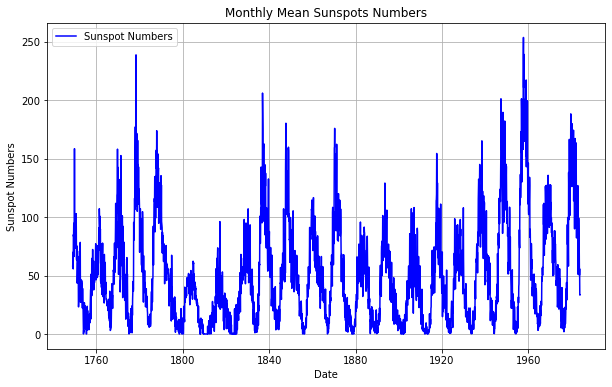

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df['Month'],df['Sunspots'],color='b',label='Sunspot Numbers')
plt.xlabel('Date')
plt.ylabel('Sunspot Numbers')
plt.title('Monthly Mean Sunspots Numbers')
plt.grid(True)
plt.legend()
plt.show()


In [10]:
df.describe()

,Sunspots
count,2820.000000
mean,51.265957
std,43.448971
min,0.000000
25%,15.700000
50%,42.000000
75%,74.925000
max,253.800000


<AxesSubplot:xlabel='Month'>

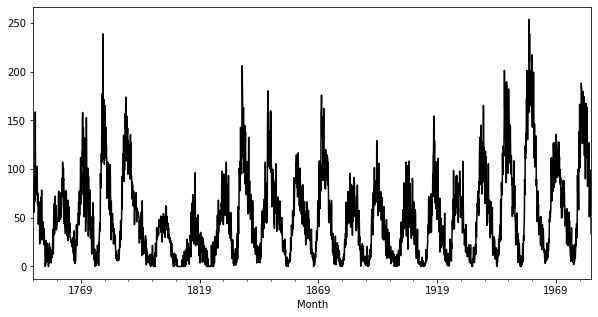

In [12]:
df['Month']=pd.to_datetime(df['Month'])
data_new=df.set_index(df['Month'])
data_new1=data_new.drop(labels=['Month'],axis=1)
fig=plt.figure(figsize=(10,5))
data_new1['Sunspots'].plot(style='k')

In [13]:
data_q=data_new1.resample('q').mean()
data_q.head()

,Sunspots
Month,
1749-03-31,63.533333
1749-06-30,74.733333
1749-09-30,79.000000
1749-12-31,106.433333
1750-03-31,79.466667


In [14]:
def adfuller_test(data):
    result=adfuller(data)
    labels=['ADF Tesr Statistics','p-value','Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+":"+str(value))
    if result[1]<=0.05:
        print('Strong evidence against null hypothesis(Ho),reject the null hypothesis.Data has no unit and is stationary')
    else:
        print('weak evidence against null hypothesis,time series has a unit root,indicating it is non-stationary')

<AxesSubplot:xlabel='Month'>

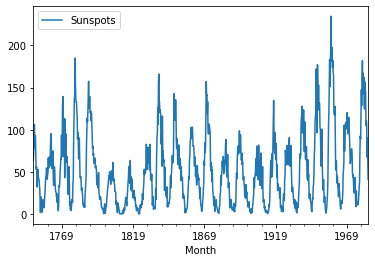

In [15]:
data_q.plot()

<AxesSubplot:xlabel='Month'>

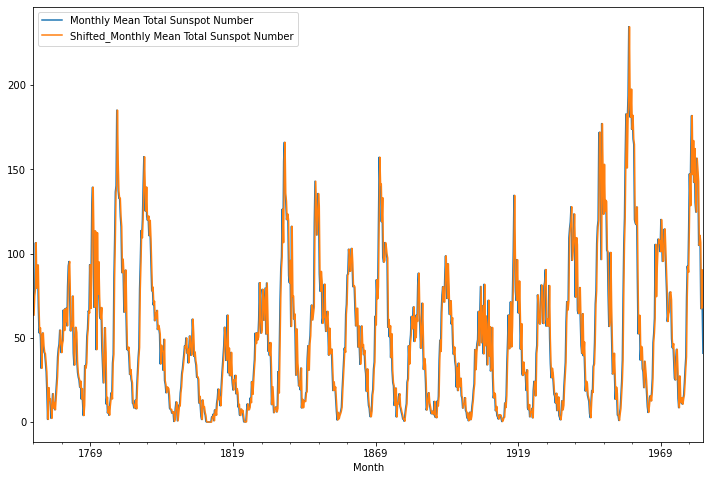

In [17]:
base_data=data_q.copy()
base_data['Monthly Mean Total Sunspot Number']=base_data['Sunspots']
base_data['Shifted_Monthly Mean Total Sunspot Number']=base_data['Monthly Mean Total Sunspot Number'].shift(1)
base_data[['Monthly Mean Total Sunspot Number','Shifted_Monthly Mean Total Sunspot Number']].plot(figsize=(12,8))

In [18]:
base_data=base_data.dropna()
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:'+str(mean_squared_error(base_data['Monthly Mean Total Sunspot Number'],
                                                   base_data['Shifted_Monthly Mean Total Sunspot Number'])))

Mean Squared Error:238.7011821086262


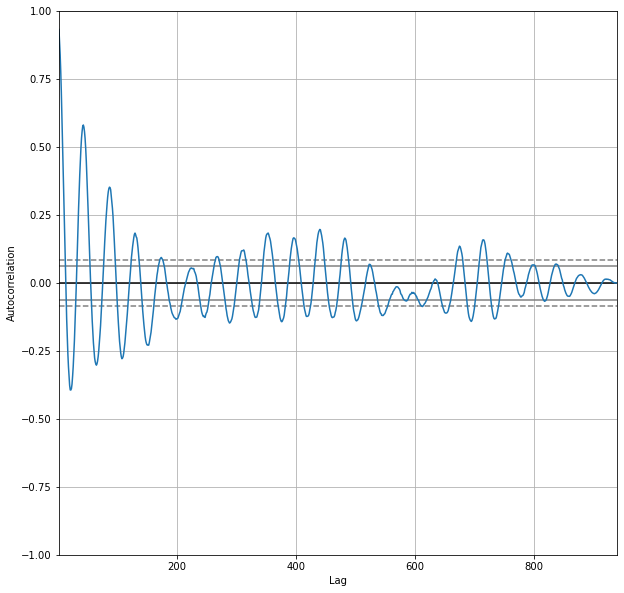

In [19]:
fig=plt.figure(figsize=(10,10))
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data_q)
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


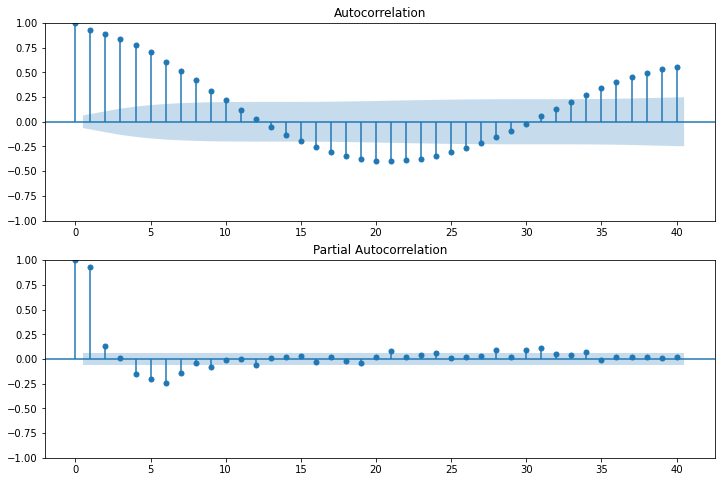

In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
import statsmodels.api as sm 
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(data_q,lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(data_q,lags=40,ax=ax2)

In [26]:
from statsmodels.tsa.arima_model import ARIMA
model=sm.tsa.statespace.SARIMAX(data_q['Sunspots'],order=(2,0,2),seasonal_order=(2,0,2,6))
results=model.fit()

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                          Sunspots   No. Observations:                  940
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 6)   Log Likelihood               -3859.946
Date:                           Thu, 20 Mar 2025   AIC                           7737.892
Time:                                   12:13:58   BIC                           7781.505
Sample:                               03-31-1749   HQIC                          7754.518
                                    - 12-31-1983                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7896      0.076     23.421      0.000       1.640       1.939
ar.L2         -0.7911      0.077    -10.330      0.000      -0.941      -0.641
ma.L1         -1.1078      0.073    -15.106      0.000      -1.251      -0.964
ma.L2          0.3441      0.025     13.788      0.000       0.295       0.393
ar.S.L6        1.2724      0.043     29.302      0.000       1.187       1.358
ar.S.L12      -0.9211      0.044    -21.160      0.000      -1.006      -0.836
ma.S.L6       -1.2794      0.053    -24.190      0.000      -1.383      -1.176
ma.S.L12       0.8753      0.052     16.972      0.000       0.774       0.976
sigma2       214.5559      7.299     29.397      0.000     200.251     228.861
===================================================================================
Ljung-Box (L1) (Q):                   2.11   Jarque-Bera (JB):               129.48
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               1.64   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:xlabel='Month'>

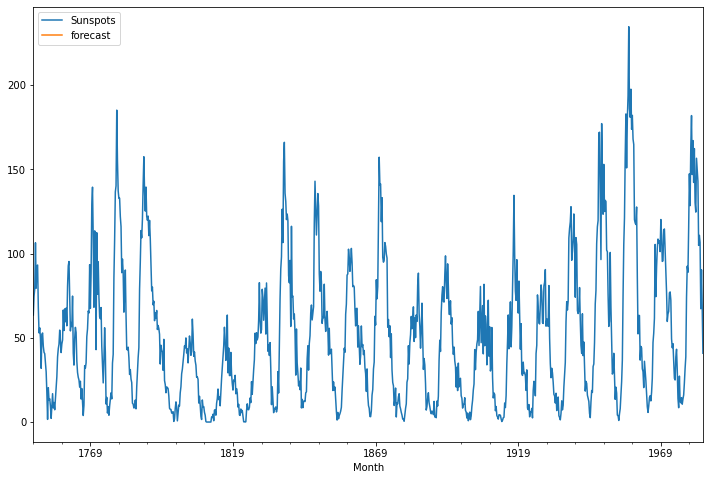

In [28]:
data_q['forecast']=results.predict(start=1000,end=1084,dynamic=True)
data_q[['Sunspots','forecast']].plot(figsize=(12,8))